In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('preprocessed_data.csv')

In [6]:
# Lựa chọn các đặc trưng và biến mục tiêu
X = data[['size', 'rooms', 'category_name', 'area_name']]
y = data['price']

In [7]:
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Chọn các đặc trưng cho việc phân cụm
X_cluster = X_train[['size', 'rooms', 'category_name', 'area_name']]

In [9]:
# Khởi tạo một loạt các giá trị k để thử nghiệm
k_values = range(2, 11)  # Thử nghiệm từ 2 đến 10 cụm

# Khởi tạo mảng để lưu trữ các điểm silhouette score
silhouette_scores = []

# Lặp qua từng giá trị k và tính silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_cluster)
    labels = kmeans.predict(X_cluster)
    silhouette = silhouette_score(X_cluster, labels)
    silhouette_scores.append(silhouette)

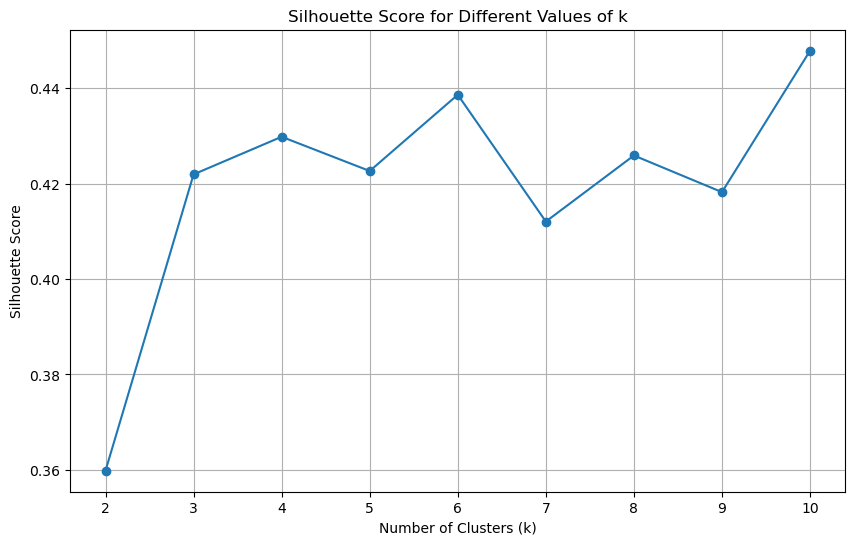

In [10]:
# Trực quan hóa silhouette score
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [11]:
# Chọn số lượng cụm tối ưu dựa trên silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_k)

Optimal number of clusters: 10


In [12]:
# Khởi tạo lại mô hình KMeans với số lượng cụm tối ưu
kmeans_optimal = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans_optimal.fit(X_cluster)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [13]:
# Gán nhãn cụm cho dữ liệu huấn luyện và kiểm tra
train_labels = kmeans_optimal.predict(X_train[['size', 'rooms', 'category_name', 'area_name']])
test_labels = kmeans_optimal.predict(X_test[['size', 'rooms', 'category_name', 'area_name']])

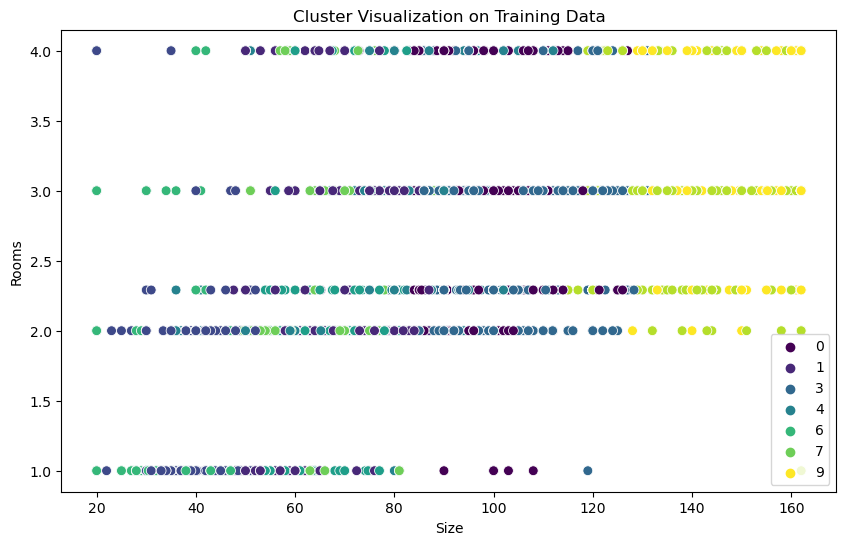

In [14]:
# Trực quan hóa các cụm trên tập dữ liệu huấn luyện
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['size'], y=X_train['rooms'], hue=train_labels, palette='viridis', s=50)
plt.title('Cluster Visualization on Training Data')
plt.xlabel('Size')
plt.ylabel('Rooms')
plt.show()

Biểu đồ này hiển thị kết quả phân cụm trên dữ liệu huấn luyện, với trục x là kích thước (Size) và trục y là số phòng (Rooms). Dưới đây là một số nhận xét chi tiết về biểu đồ:

Cấu trúc phân cụm: Biểu đồ này sử dụng các màu sắc khác nhau để biểu thị các cụm khác nhau, từ cụm 0 đến cụm 9. Điều này giúp dễ dàng nhận diện các cụm dữ liệu riêng biệt trên biểu đồ.

Phân bố kích thước và số phòng:

Các điểm dữ liệu trải dài trên nhiều giá trị kích thước khác nhau, từ khoảng 20 đến 160.
Số phòng chủ yếu tập trung vào các giá trị 1, 2, 3 và 4, với số lượng phòng lớn hơn thì ít dữ liệu hơn.
Phân cụm theo số phòng:

Mỗi số lượng phòng cụ thể (1, 2, 3, 4) dường như có các cụm riêng biệt, thể hiện rõ ràng qua các màu sắc khác nhau.
Cụm 0 (màu tím đậm) và cụm 1 (màu xanh đậm) có vẻ xuất hiện ở nhiều giá trị kích thước và số phòng khác nhau, cho thấy sự phân bố rộng rãi của các cụm này.
Phân cụm theo kích thước:

Cụm 7 (màu vàng) và cụm 9 (màu xanh lục sáng) chủ yếu xuất hiện ở các kích thước lớn hơn, có thể là những ngôi nhà lớn hơn với nhiều phòng.
Cụm 0 và cụm 1 xuất hiện chủ yếu ở các kích thước nhỏ hơn, gợi ý rằng chúng có thể là các ngôi nhà nhỏ hơn với ít phòng hơn.
Nhận diện các cụm:

Biểu đồ giúp nhận diện rõ ràng các cụm khác nhau và cách chúng phân bố theo kích thước và số phòng.
Các cụm không bị chồng chéo nhiều, cho thấy kết quả phân cụm có thể đạt được sự phân biệt tốt giữa các nhóm dữ liệu.
Tóm lại, biểu đồ này cho thấy việc phân cụm đã tạo ra các nhóm dữ liệu khác nhau dựa trên kích thước và số phòng. Các cụm có sự phân biệt rõ ràng, và mỗi cụm có sự phân bố khác nhau về kích thước và số phòng. Điều này có thể giúp ích trong việc phân tích và hiểu rõ hơn về cấu trúc dữ liệu.

In [15]:
# Tính trung bình giá trị trong mỗi cụm
cluster_centers = np.array([y_train[train_labels == i].mean() for i in range(optimal_k)])

In [16]:
# Dự đoán giá trị dựa trên trung bình của cụm tương ứng cho tập kiểm tra
y_pred = np.array([cluster_centers[label] for label in test_labels])

In [17]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_score = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score on Test Data:", test_score)

Mean Squared Error (MSE): 7.088774875515432e+18
Mean Absolute Error (MAE): 1675199826.8935075
Mean Absolute Percentage Error (MAPE): 54.135865858300924
R^2 Score on Test Data: 0.4407872796695175


Mean Squared Error (MSE): Giá trị MSE rất cao, đây là kết quả trung bình của bình phương sai số giữa giá trị thực tế và giá trị dự đoán. Khi MSE lớn, điều này cho thấy mô hình đang có xu hướng dự đoán sai lệch so với giá trị thực tế, và sai số này có thể lớn và không ổn định.

Mean Absolute Error (MAE): MAE cũng khá cao, đây là giá trị trung bình của tổng các sai số tuyệt đối giữa giá trị thực và giá trị dự đoán. Một MAE lớn cũng cho thấy rằng mô hình đang có xu hướng dự đoán sai lệch và không ổn định.

Mean Absolute Percentage Error (MAPE): MAPE cũng cao, với giá trị khoảng 54.14%. Đây là phần trăm trung bình của sai số tuyệt đối so với giá trị thực tế. Một MAPE cao có thể chỉ ra rằng mô hình không hoạt động tốt trong việc dự đoán giá trị bất động sản.

R^2 Score on Test Data: R^2 Score thể hiện mức độ biến thiên của biến phụ thuộc mà mô hình giải thích được. Một R^2 Score thấp như vậy (khoảng 0.44) có thể cho thấy mô hình không tốt trong việc giải thích biến động của giá trị bất động sản.

Tóm lại, dựa trên các chỉ số đánh giá trên, mô hình hiện tại cần được cải thiện để có thể dự đoán giá bất động sản một cách chính xác hơn và ổn định hơn. Có thể cần xem xét việc tăng cường dữ liệu hoặc điều chỉnh các siêu tham số của mô hình để cải thiện hiệu suất.

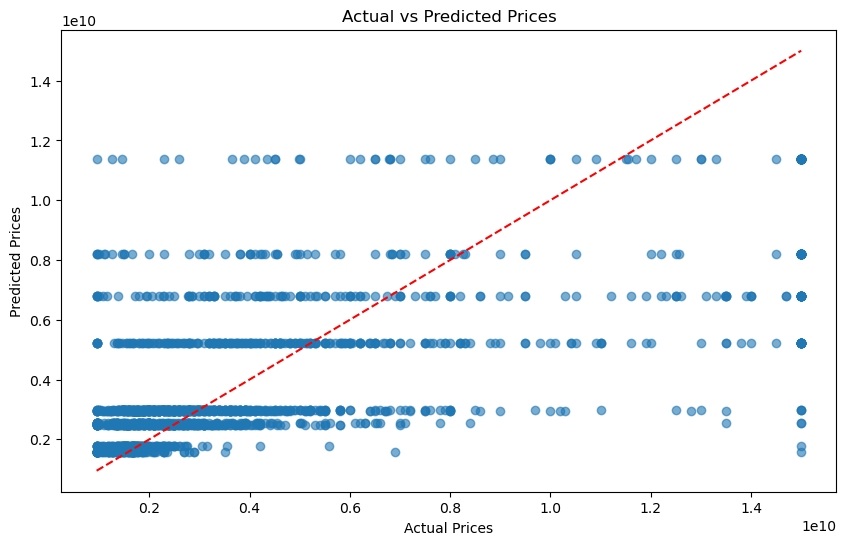

In [18]:
# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()